# Section 1: Data Loading and Data Understanding

## 1.1 Import Required Libraries

In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2 Load the Dataset

In [2]:
df = pd.read_csv("augmented_recurred_dataset_1600_age_fixed.csv")
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,38,M,Yes,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Uni-Focal,Intermediate,T3a,N1b,M0,I,Structural Incomplete,Yes
1,67,F,No,No,No,Euthyroid,Multinodular goiter,No,Hurthel cell,Uni-Focal,Intermediate,T3a,N0,M0,II,Indeterminate,Yes
2,36,F,No,No,No,Euthyroid,Single nodular goiter-left,Left,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,I,Indeterminate,Yes
3,53,M,No,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,I,Structural Incomplete,Yes
4,48,M,No,No,No,Euthyroid,Single nodular goiter-left,Left,Papillary,Uni-Focal,Intermediate,T2,N1a,M0,I,Indeterminate,No


## 1.3 Dataset Shape (Rows & Columns)

In [3]:
df.shape

(1600, 17)

## 1.4 Column Information & Data Types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   1600 non-null   int64 
 1   Gender                1600 non-null   object
 2   Smoking               1600 non-null   object
 3   Hx Smoking            1600 non-null   object
 4   Hx Radiothreapy       1600 non-null   object
 5   Thyroid Function      1600 non-null   object
 6   Physical Examination  1600 non-null   object
 7   Adenopathy            1600 non-null   object
 8   Pathology             1600 non-null   object
 9   Focality              1600 non-null   object
 10  Risk                  1600 non-null   object
 11  T                     1600 non-null   object
 12  N                     1600 non-null   object
 13  M                     1600 non-null   object
 14  Stage                 1600 non-null   object
 15  Response              1600 non-null   

## 1.5 Summary Statistics (Numerical Features)

In [5]:
df.describe()

,Age
count,1600.000000
mean,42.532500
std,16.069858
min,15.000000
25%,30.000000
50%,38.000000
75%,55.000000
max,82.000000


## 1.6 Target Variable Distribution (Recurred)

In [6]:
df['Recurred'].value_counts()

Recurred
No     875
Yes    725
Name: count, dtype: int64

In [7]:
df['Recurred'].value_counts(normalize=True) * 100

Recurred
No     54.6875
Yes    45.3125
Name: proportion, dtype: float64

## 1.7 Check Missing Values

In [8]:
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

## 1.8 Basic Visualization of Target Variable

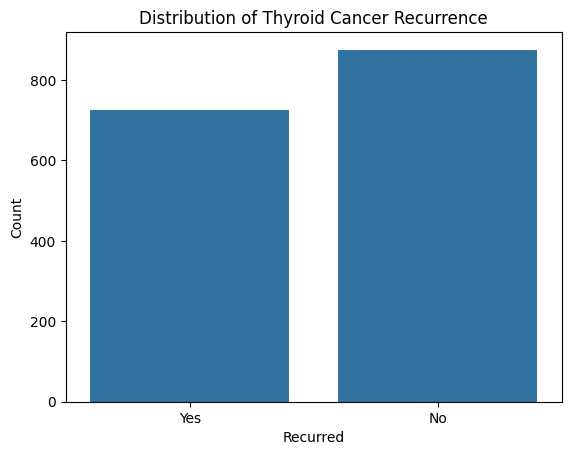

In [9]:
plt.figure()
sns.countplot(x='Recurred', data=df)
plt.title("Distribution of Thyroid Cancer Recurrence")
plt.xlabel("Recurred")
plt.ylabel("Count")
plt.show()

# Section 2: Exploratory Data Analysis (EDA)

## 2.1 Distribution of Age

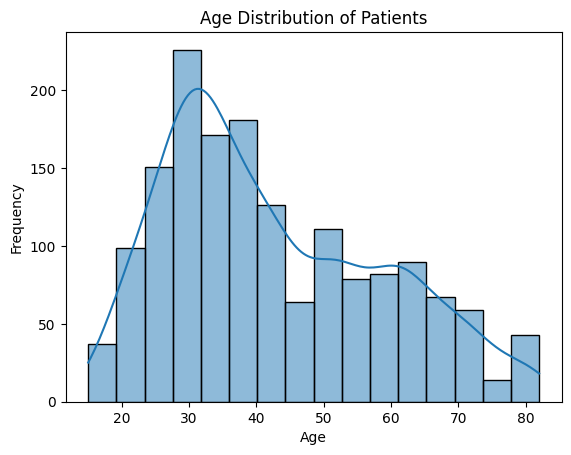

In [10]:
plt.figure()
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## 2.2 Gender Distribution

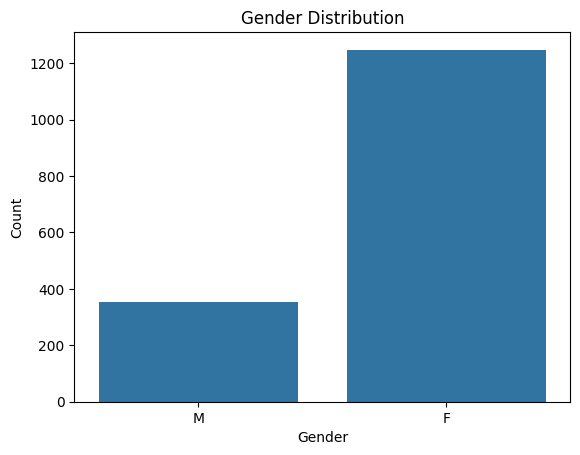

In [11]:
plt.figure()
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

## 2.3 Smoking vs Recurrence

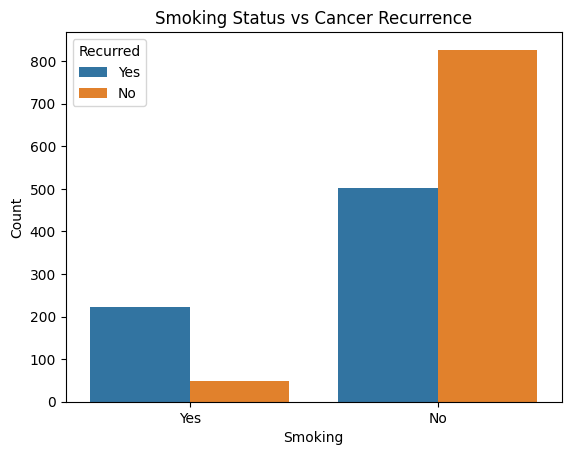

In [12]:
plt.figure()
sns.countplot(x='Smoking', hue='Recurred', data=df)
plt.title("Smoking Status vs Cancer Recurrence")
plt.xlabel("Smoking")
plt.ylabel("Count")
plt.legend(title="Recurred")
plt.show()

## 2.4 Pathology Type Distribution

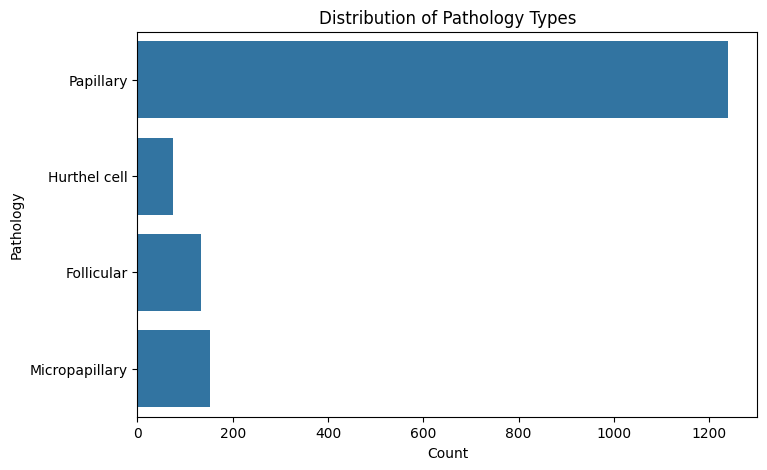

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(y='Pathology', data=df)
plt.title("Distribution of Pathology Types")
plt.xlabel("Count")
plt.ylabel("Pathology")
plt.show()

## 2.5 Risk Level vs Recurrence

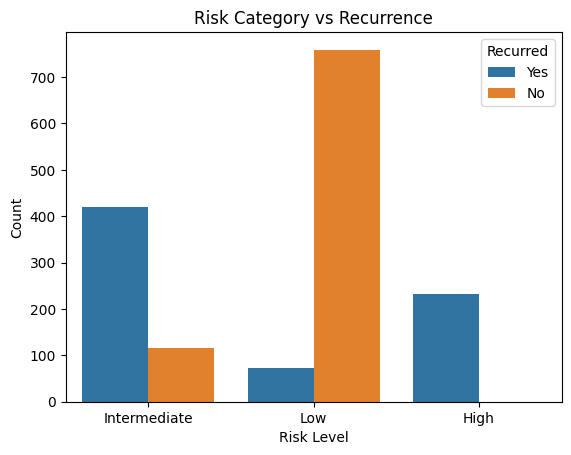

In [14]:
plt.figure()
sns.countplot(x='Risk', hue='Recurred', data=df)
plt.title("Risk Category vs Recurrence")
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.show()

## 2.6 Tumor Stage (T) vs Recurrence

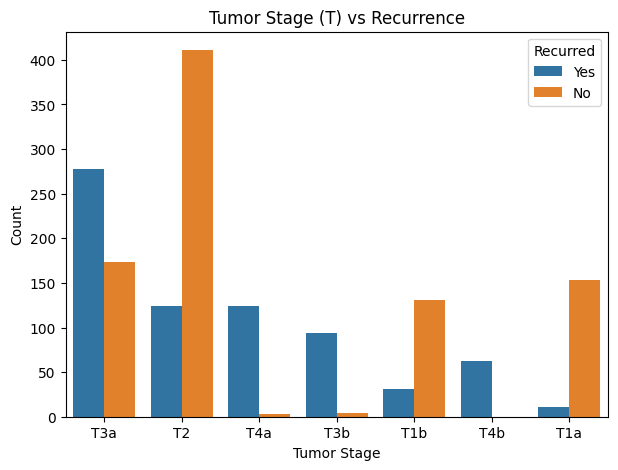

In [15]:
plt.figure(figsize=(7,5))
sns.countplot(x='T', hue='Recurred', data=df)
plt.title("Tumor Stage (T) vs Recurrence")
plt.xlabel("Tumor Stage")
plt.ylabel("Count")
plt.show()

## 2.7 Lymph Node Involvement (N) vs Recurrence

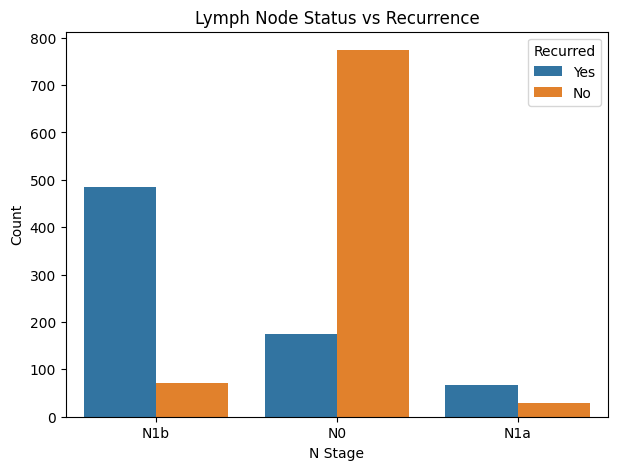

In [16]:
plt.figure(figsize=(7,5))
sns.countplot(x='N', hue='Recurred', data=df)
plt.title("Lymph Node Status vs Recurrence")
plt.xlabel("N Stage")
plt.ylabel("Count")
plt.show()

## 2.8 Response to Treatment vs Recurrence

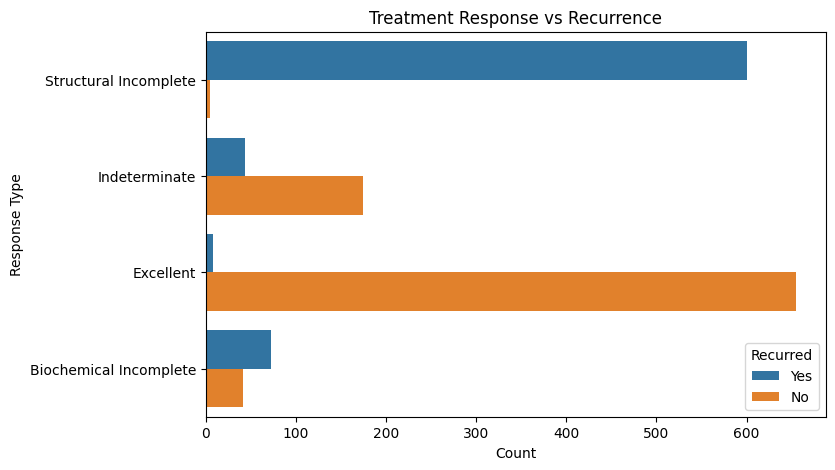

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(y='Response', hue='Recurred', data=df)
plt.title("Treatment Response vs Recurrence")
plt.xlabel("Count")
plt.ylabel("Response Type")
plt.show()

# Section 3: Feature Scaling, Data Splitting & Model Training

## 3.1 Separate Features and Target Variable

In [18]:
# Target variable
y = df['Recurred']

# Feature variables
X = df.drop('Recurred', axis=1)

## 3.2 Encode Target Variable

In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Check mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label_mapping

{'No': np.int64(0), 'Yes': np.int64(1)}

## 3.3 Encode Categorical Features

In [20]:
X_encoded = pd.get_dummies(X, drop_first=True)

## 3.4 Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

## 3.5 Train–Test Split

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

## 3.6 Model Training

### 3.6.1 Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### 3.6.2 KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN model with k=5 (you can adjust this value)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### 3.6.3 Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# Section 4: Model Evaluation (Base Models)

## 4.1 Import Evaluation Libraries

In [26]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    classification_report
)

## 4.2 Generate Predictions

In [27]:
# Predictions
y_pred_lr = log_reg.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

# Probabilities for ROC
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

## 4.3 Confusion Matrices

### Logistic Regression

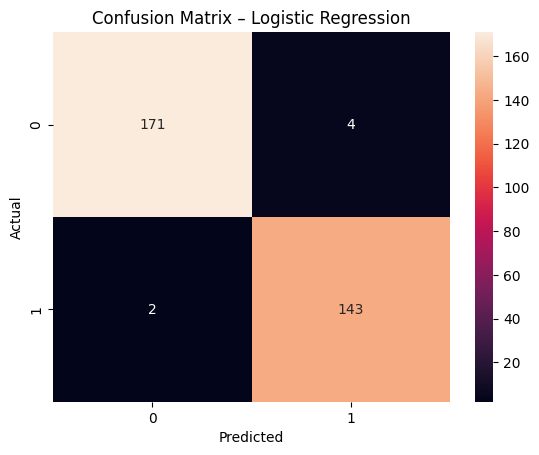

In [28]:
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d')
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### KNN

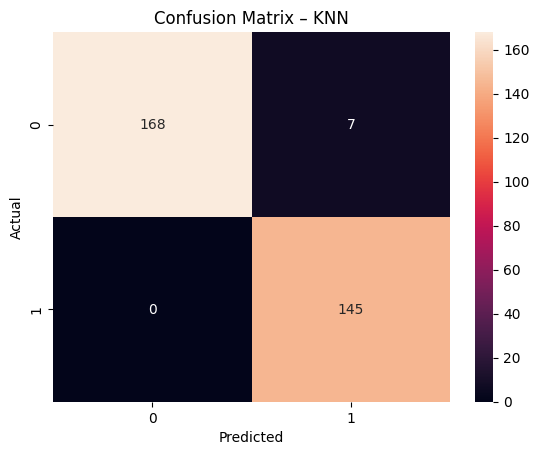

In [29]:
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d')
plt.title("Confusion Matrix – KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Decision Tree

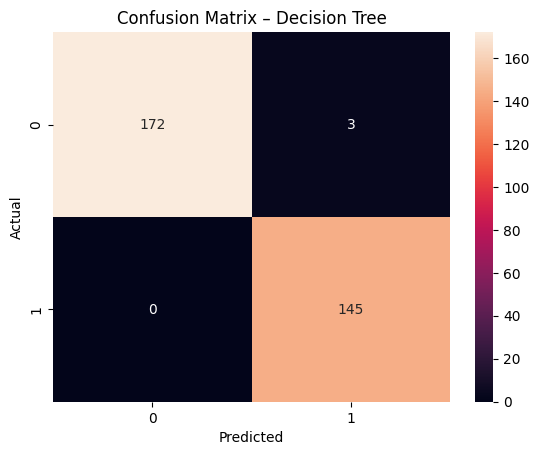

In [30]:
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d')
plt.title("Confusion Matrix – Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 4.4 Performance Metrics Table

In [31]:
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_dt)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_knn),
        precision_score(y_test, y_pred_dt)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_knn),
        recall_score(y_test, y_pred_dt)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_knn),
        f1_score(y_test, y_pred_dt)
    ]
})

metrics_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.981250,0.972789,0.986207,0.979452
1,KNN,0.978125,0.953947,1.000000,0.976431
2,Decision Tree,0.990625,0.979730,1.000000,0.989761


## 4.5 Comparative Visualization – Metric Bar Chart

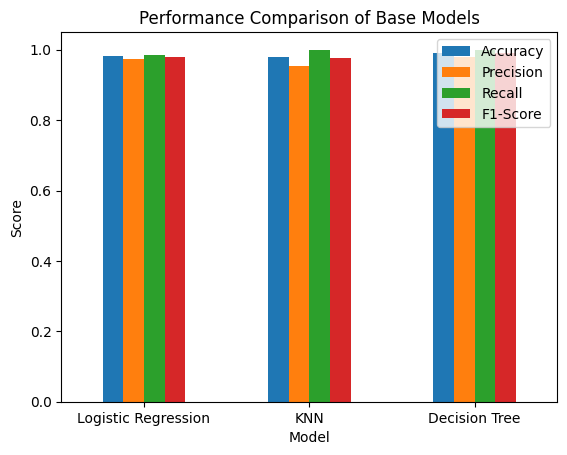

In [32]:
metrics_df.set_index('Model').plot(kind='bar')
plt.title("Performance Comparison of Base Models")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()

## 4.6 ROC Curve & AUC Comparison

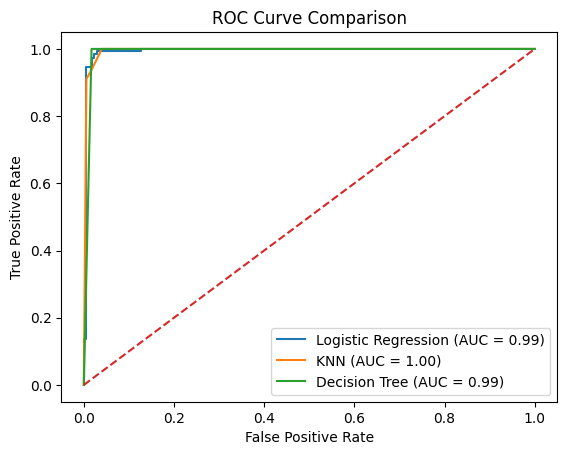

In [33]:
# ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

auc_lr = auc(fpr_lr, tpr_lr)
auc_knn = auc(fpr_knn, tpr_knn)
auc_dt = auc(fpr_dt, tpr_dt)

plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

## 4.7 AUC Score Comparison (Bar Chart)

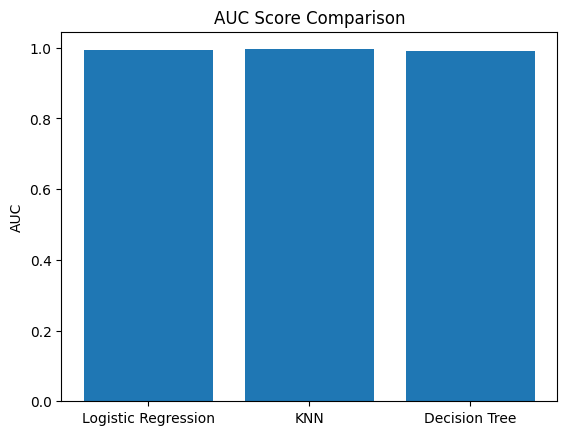

In [34]:
plt.figure()
plt.bar(['Logistic Regression', 'KNN', 'Decision Tree'],
        [auc_lr, auc_knn, auc_dt])
plt.title("AUC Score Comparison")
plt.ylabel("AUC")
plt.show()

## 4.8 Classification Reports

In [35]:
print("Logistic Regression Report\n", classification_report(y_test, y_pred_lr))
print("KNN Report\n", classification_report(y_test, y_pred_knn))
print("Decision Tree Report\n", classification_report(y_test, y_pred_dt))

Logistic Regression Report
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       175
           1       0.97      0.99      0.98       145

    accuracy                           0.98       320
   macro avg       0.98      0.98      0.98       320
weighted avg       0.98      0.98      0.98       320

KNN Report
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       175
           1       0.95      1.00      0.98       145

    accuracy                           0.98       320
   macro avg       0.98      0.98      0.98       320
weighted avg       0.98      0.98      0.98       320

Decision Tree Report
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       175
           1       0.98      1.00      0.99       145

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg

# Section 5: Hyperparameter Tuning & Performance Comparison

## 5.1 Hyperparameter Tuning Using Grid Search

### 5.1.1 Logistic Regression Tuning (penalty, C)

In [36]:
from sklearn.model_selection import GridSearchCV

lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

lr_grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    lr_param_grid,
    scoring='f1',
    cv=5
)

lr_grid.fit(X_train, y_train)

best_lr = lr_grid.best_estimator_
lr_grid.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

### 5.1.2 KNN

In [37]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11]
}

knn_grid = GridSearchCV(
    KNeighborsClassifier(),
    knn_param_grid,
    scoring='f1',
    n_jobs=-1
)
knn_grid.fit(X_train, y_train)


best_knn = knn_grid.best_estimator_
knn_grid.best_params_

{'n_neighbors': 3}

### 5.1.3 Decision Tree Tuning (max_depth, min_samples_split)

In [38]:
dt_param_grid = {
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_param_grid,
    scoring='f1',
    cv=5
)

dt_grid.fit(X_train, y_train)

best_dt = dt_grid.best_estimator_
dt_grid.best_params_

{'max_depth': None, 'min_samples_split': 2}

## 5.2 Predictions of Tuned Models

In [39]:
# Predictions
y_pred_lr_tuned = best_lr.predict(X_test)
y_pred_knn_tuned = best_knn.predict(X_test)
y_pred_dt_tuned = best_dt.predict(X_test)

# Probabilities
y_prob_lr_tuned = best_lr.predict_proba(X_test)[:, 1]
y_prob_knn_tuned = best_knn.predict_proba(X_test)[:, 1]
y_prob_dt_tuned = best_dt.predict_proba(X_test)[:, 1]

## 5.3 Before vs After Metrics Comparison Table

In [40]:
comparison_df = pd.DataFrame({
    'Model': [
        'Logistic Regression (Base)', 'Logistic Regression (Tuned)',
        'KNN (Base)', 'KNN (Tuned)',
        'Decision Tree (Base)', 'Decision Tree (Tuned)'
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_lr_tuned),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_knn_tuned),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_dt_tuned)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_lr_tuned),
        precision_score(y_test, y_pred_knn),
        precision_score(y_test, y_pred_knn_tuned),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_dt_tuned)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_lr_tuned),
        recall_score(y_test, y_pred_knn),
        recall_score(y_test, y_pred_knn_tuned),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_dt_tuned)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_lr_tuned),
        f1_score(y_test, y_pred_knn),
        f1_score(y_test, y_pred_knn_tuned),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_dt_tuned)
    ]
})

comparison_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression (Base),0.981250,0.972789,0.986207,0.979452
1,Logistic Regression (Tuned),0.978125,0.966216,0.986207,0.976109
2,KNN (Base),0.978125,0.953947,1.000000,0.976431
3,KNN (Tuned),0.990625,0.979730,1.000000,0.989761
4,Decision Tree (Base),0.990625,0.979730,1.000000,0.989761
5,Decision Tree (Tuned),0.990625,0.979730,1.000000,0.989761


## 5.4 Visualization 1: Before vs After (F1-Score Comparison)

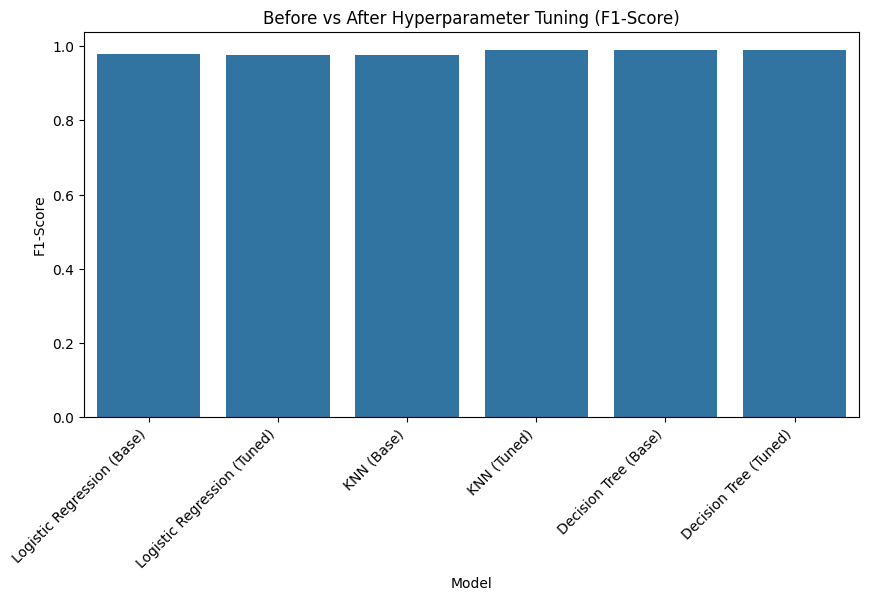

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(x='Model', y='F1-Score', data=comparison_df)
plt.xticks(rotation=45, ha='right')
plt.title("Before vs After Hyperparameter Tuning (F1-Score)")
plt.show()

## 5.5 Visualization 2: Metric Improvement Heatmap

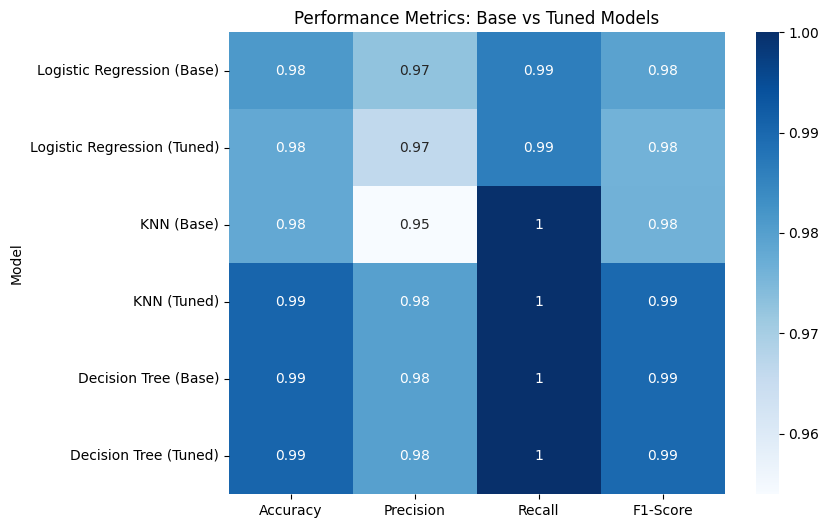

In [42]:
plt.figure(figsize=(8,6))
sns.heatmap(
    comparison_df.set_index('Model'),
    annot=True,
    cmap='Blues'
)
plt.title("Performance Metrics: Base vs Tuned Models")
plt.show()

## 5.6 Visualization 3: ROC Curve – Base vs Tuned

### Logistic Regression ROC Comparison

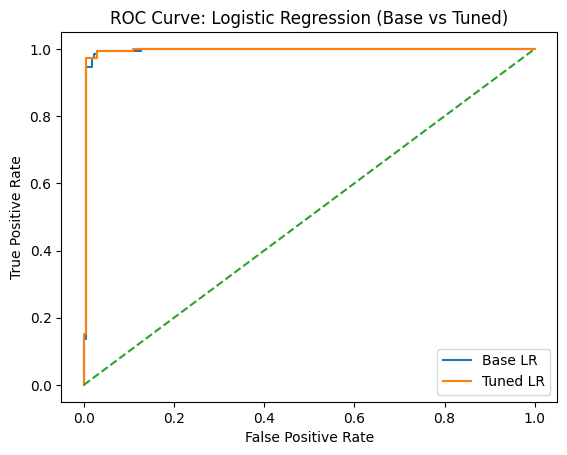

In [43]:
fpr_base, tpr_base, _ = roc_curve(y_test, y_prob_lr)
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_lr_tuned)

plt.figure()
plt.plot(fpr_base, tpr_base, label='Base LR')
plt.plot(fpr_tuned, tpr_tuned, label='Tuned LR')
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Logistic Regression (Base vs Tuned)")
plt.legend()
plt.show()

### KNN ROC Comparison

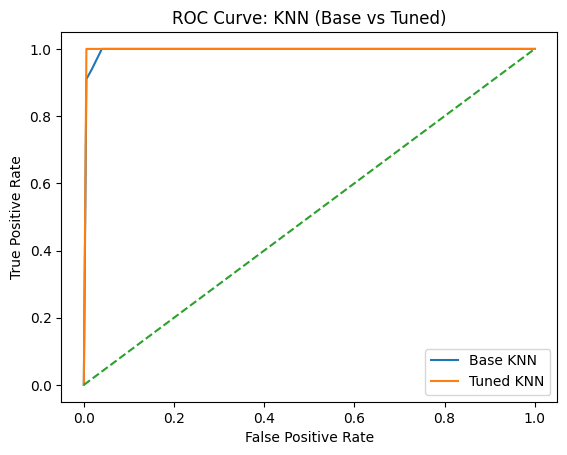

In [44]:
fpr_base, tpr_base, _ = roc_curve(y_test, y_prob_knn)
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_knn_tuned)

plt.figure()
plt.plot(fpr_base, tpr_base, label='Base KNN')
plt.plot(fpr_tuned, tpr_tuned, label='Tuned KNN')
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: KNN (Base vs Tuned)")
plt.legend()
plt.show()

### Decision Tree ROC Comparison

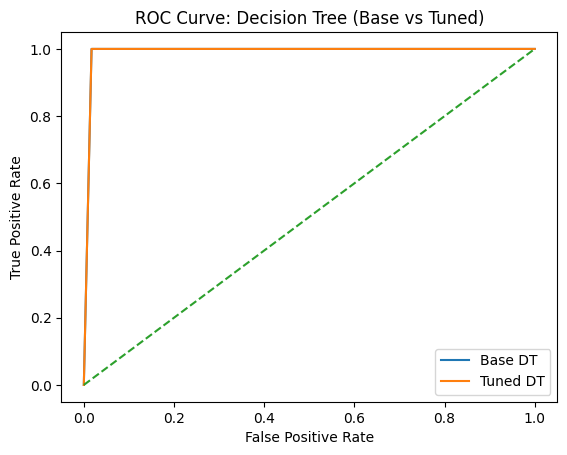

In [45]:
fpr_base, tpr_base, _ = roc_curve(y_test, y_prob_dt)
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_dt_tuned)

plt.figure()
plt.plot(fpr_base, tpr_base, label='Base DT')
plt.plot(fpr_tuned, tpr_tuned, label='Tuned DT')
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Decision Tree (Base vs Tuned)")
plt.legend()
plt.show()

## 5.7 Visualization 4: AUC Improvement Bar Chart

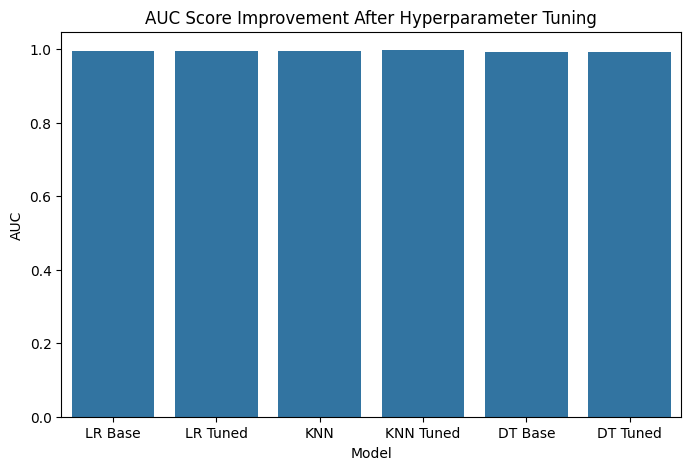

In [46]:
auc_comparison = pd.DataFrame({
    'Model': ['LR Base', 'LR Tuned', 'KNN', 'KNN Tuned', 'DT Base', 'DT Tuned'],
    'AUC': [
        auc(*roc_curve(y_test, y_prob_lr)[:2]),
        auc(*roc_curve(y_test, y_prob_lr_tuned)[:2]),
        auc(*roc_curve(y_test, y_prob_knn)[:2]),
        auc(*roc_curve(y_test, y_prob_knn_tuned)[:2]),
        auc(*roc_curve(y_test, y_prob_dt)[:2]),
        auc(*roc_curve(y_test, y_prob_dt_tuned)[:2])
    ]
})

plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='AUC', data=auc_comparison)
plt.title("AUC Score Improvement After Hyperparameter Tuning")
plt.show()